<a href="https://colab.research.google.com/github/dananjayakumar/Ic-engine/blob/main/house_pricing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload

Understanding the dataset and exploration

importing the libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

reading the dataset

In [ ]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})

In [ ]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})

In [ ]:
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [ ]:
df['basement']=df['basement'].map({'yes':1,'no':0})

In [ ]:
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [ ]:
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})

In [ ]:
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [ ]:
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})

In [ ]:
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [ ]:
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})

In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df=pd.get_dummies(data=df,columns=['furnishingstatus'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_furnished       545 non-null    u

In [ ]:
df = df.astype(int)

In [ ]:
df.duplicated().sum()

0

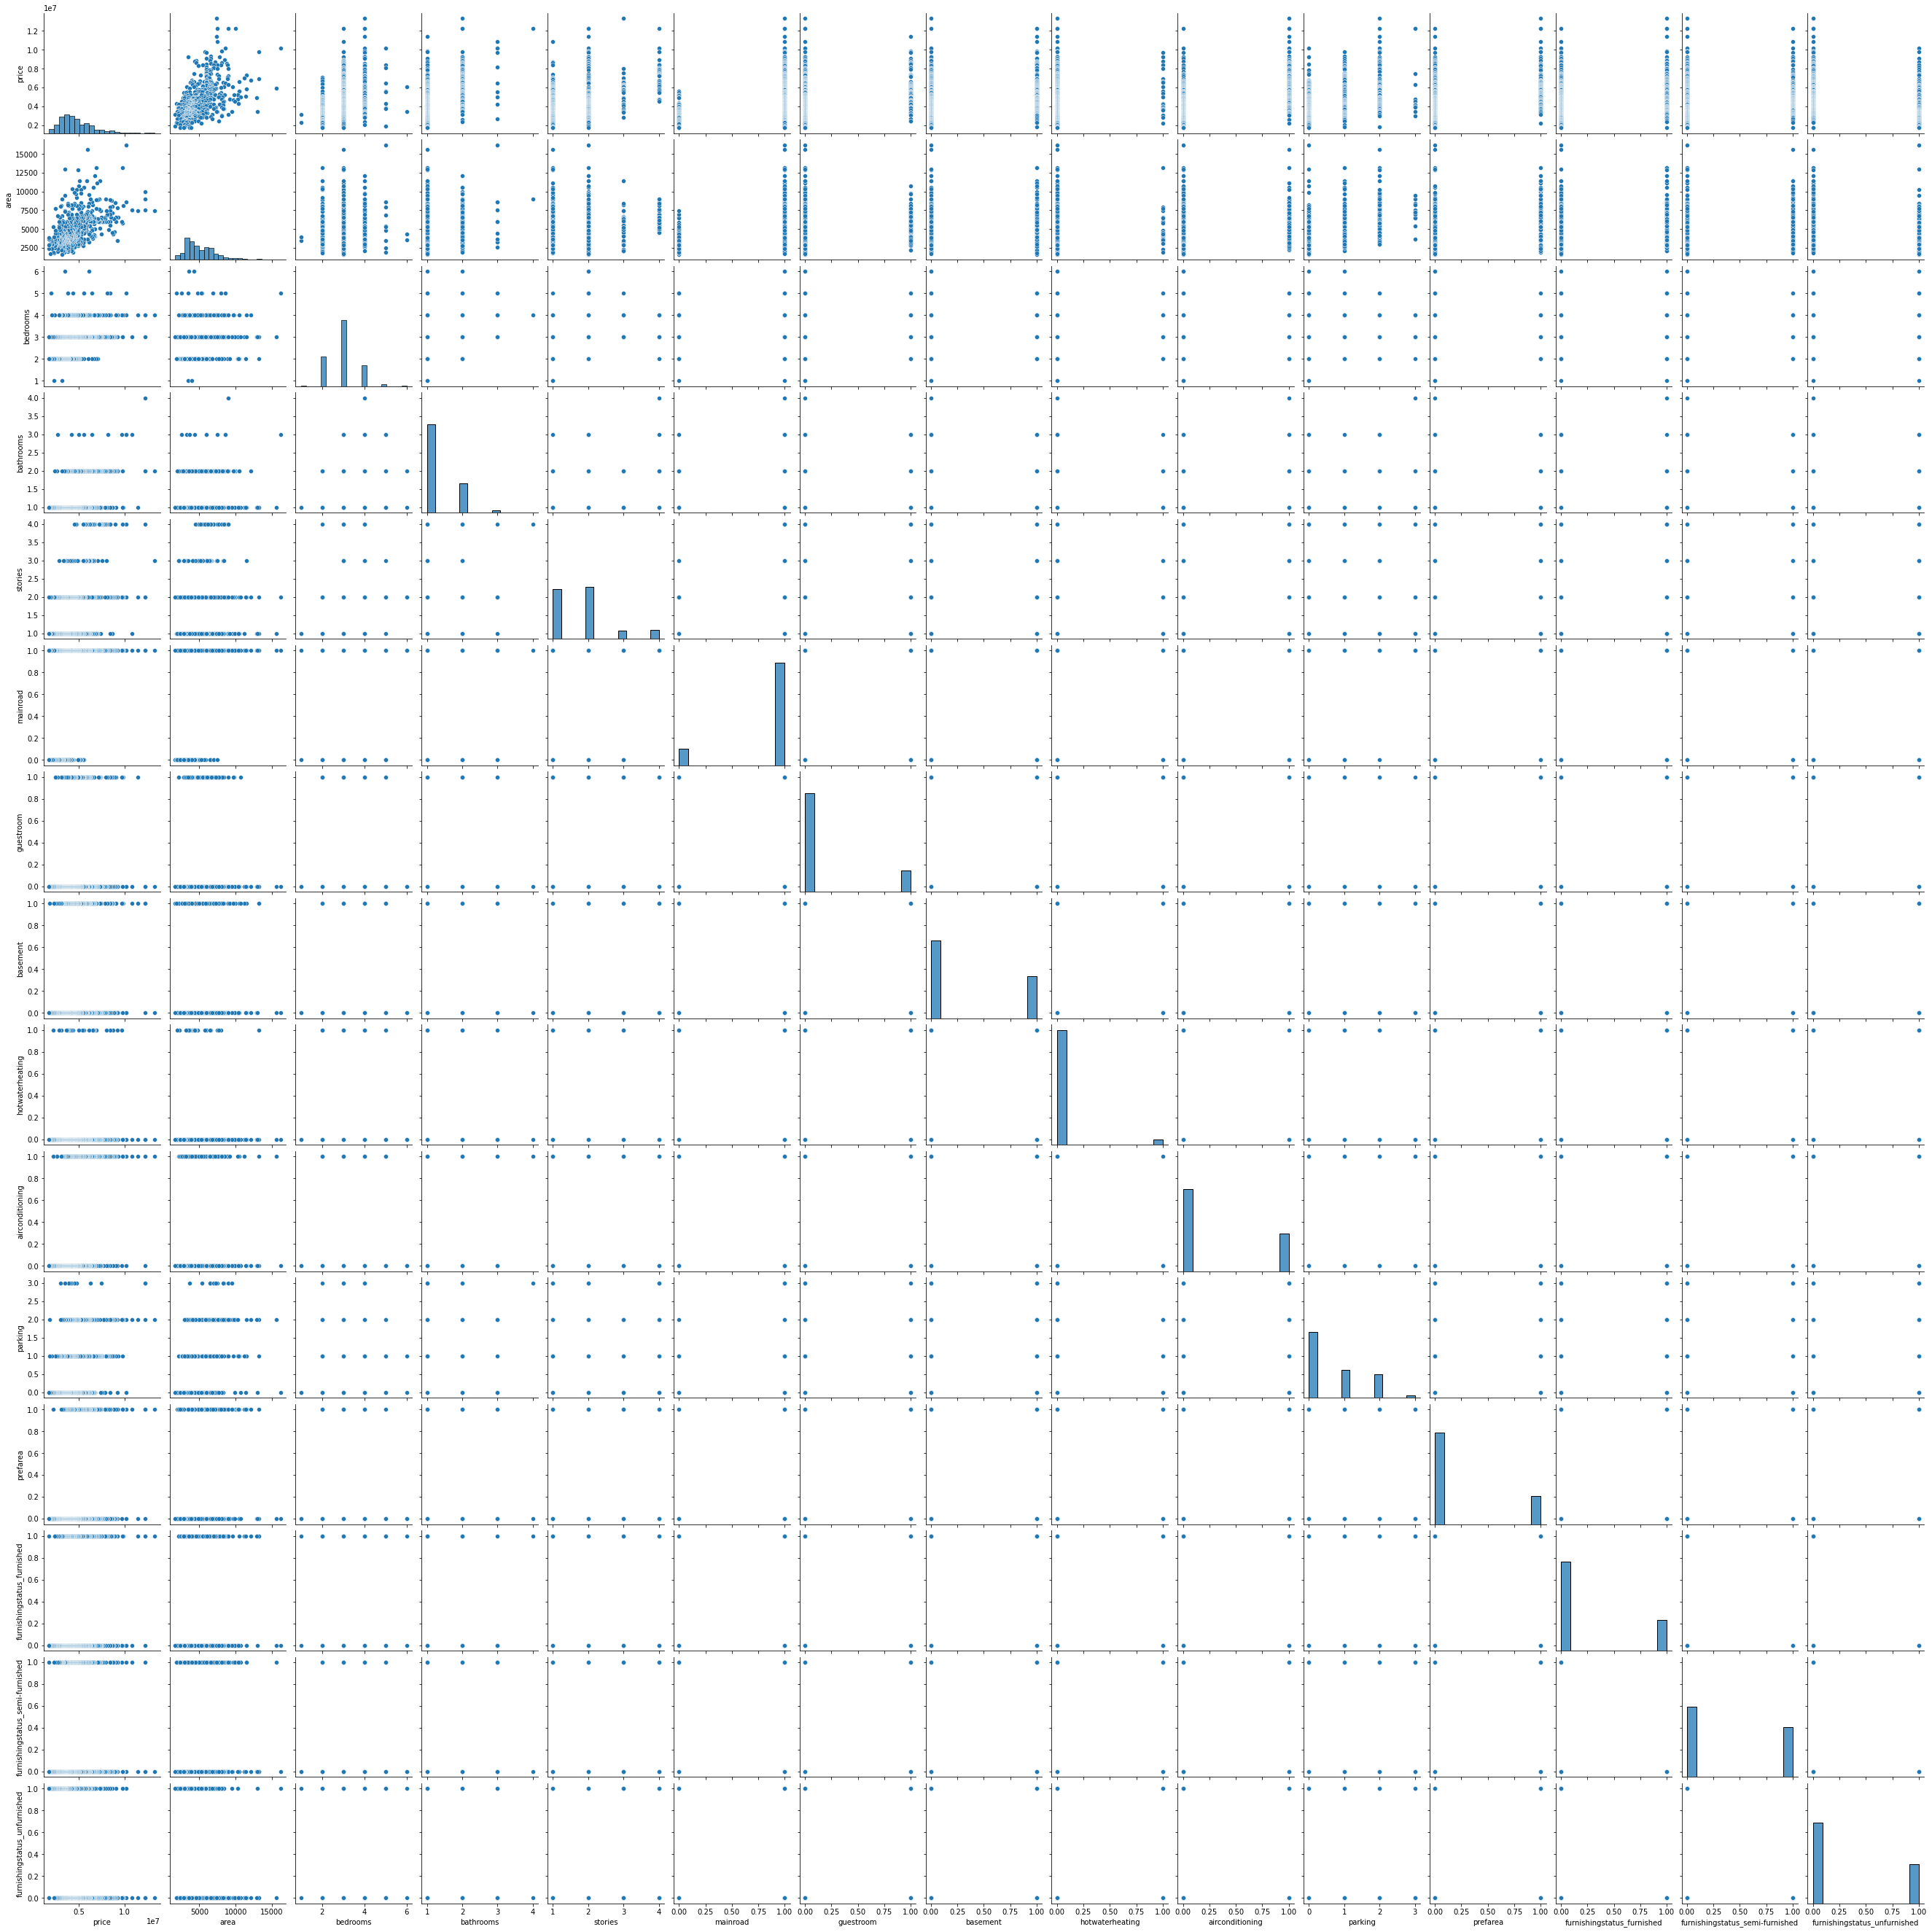

In [ ]:
sns.pairplot(df)

<AxesSubplot:xlabel='price', ylabel='Count'>

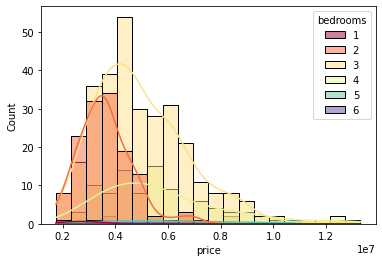

In [ ]:
sns.histplot(data=df,x='price',hue='bedrooms',bins=20,kde=True,palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='Density'>

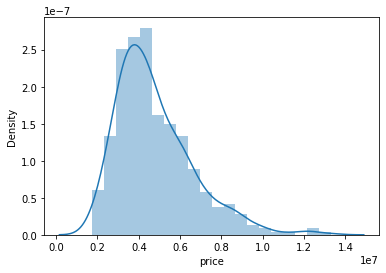

In [ ]:
sns.distplot(df['price'],bins=20)

<AxesSubplot:xlabel='area', ylabel='Density'>

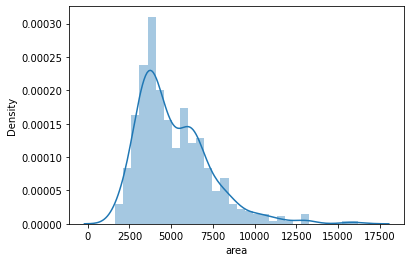

In [ ]:
sns.distplot(df['area'],bins=30)

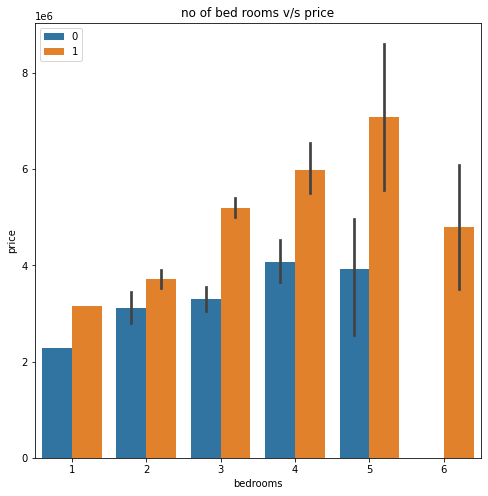

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='bedrooms',y='price',hue='mainroad')
plt.title('no of bed rooms v/s price')
plt.legend(loc='best')
plt.show()

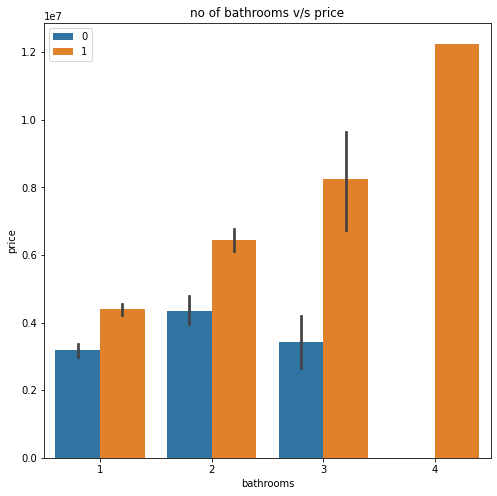

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='bathrooms',y='price',hue='mainroad')
plt.title('no of bathrooms v/s price')
plt.legend(loc='best')
plt.show()

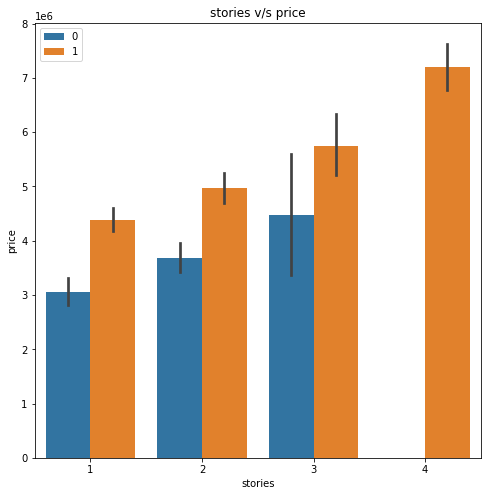

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='stories',y='price',hue='mainroad')
plt.title('stories v/s price')
plt.legend(loc='best')
plt.show()

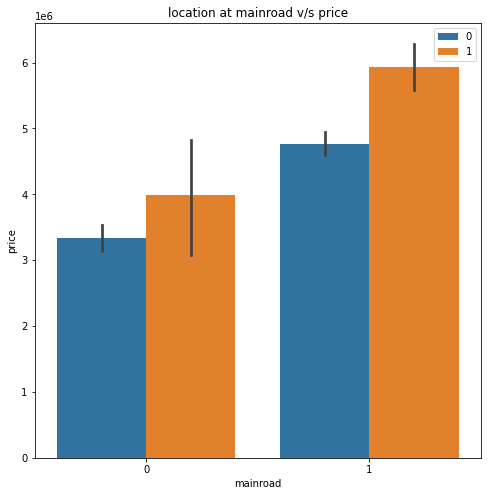

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='mainroad',y='price',hue='guestroom')
plt.title('location at mainroad v/s price')
plt.legend(loc='best')
plt.show()

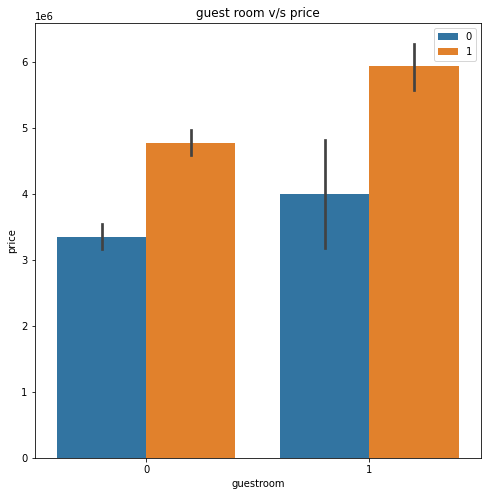

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='guestroom',y='price',hue='mainroad')
plt.title('guest room v/s price')
plt.legend(loc='best')
plt.show()

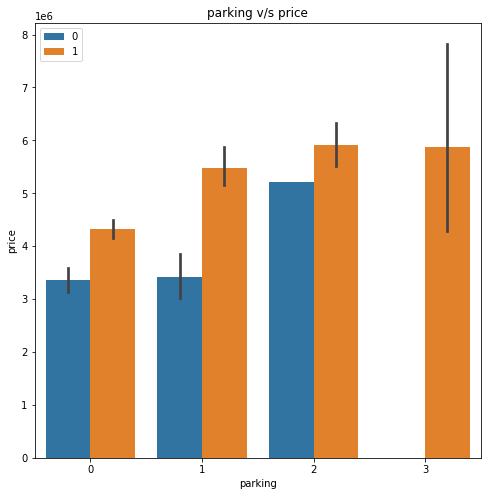

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='parking',y='price',hue='mainroad')
plt.title('parking v/s price')
plt.legend(loc='best')
plt.show()

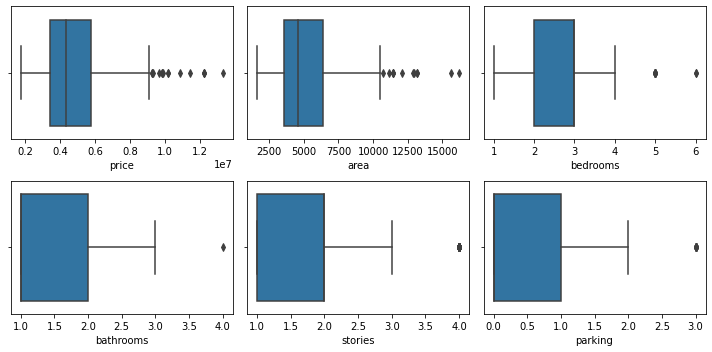

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

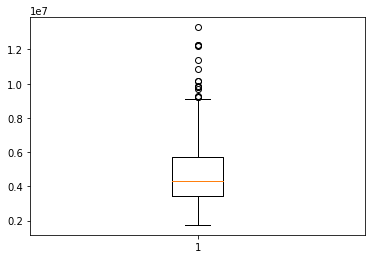

In [ ]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

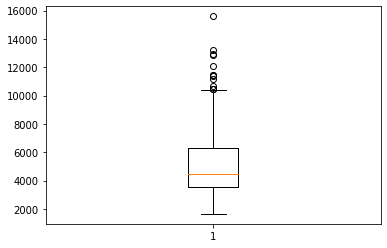

In [ ]:
plt.boxplot(df['area'])
Q1=df['area'].quantile(0.25)
Q3=df['area'].quantile(0.75)
IQR=Q3-Q1
maximum = Q3 + 1.5*IQR
minimum=Q1-1.5*IQR
df = df[(df.area >= minimum) & (df.area <= maximum)]



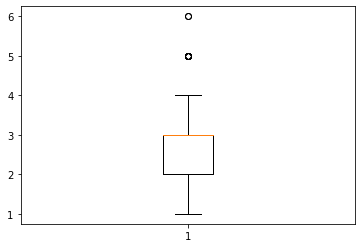

In [ ]:
plt.boxplot(df['bedrooms'])
Q1=df['bedrooms'].quantile(0.25)
Q3=df['bedrooms'].quantile(0.75)
IQR=Q3-Q1
maximum = Q3 + 1.5*IQR
minimum=Q1-1.5*IQR
df = df[(df.bedrooms >= minimum) & (df.bedrooms <= maximum)]


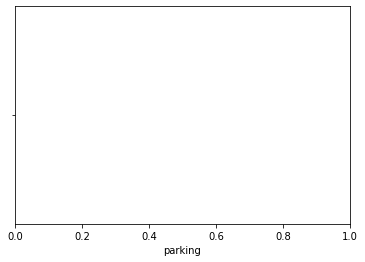

In [ ]:
sns.boxplot(df['parking'])
q1=df['parking'].quantile(0.25)
q3=df['parking'].quantile(0.75)
iqr=q3-q1
df=df[(df.parking>q1+1.5*iqr) & (df.parking<q3-1.5*iqr)]

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,NaN,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,NaN,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,NaN,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,NaN,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,NaN,0,1,2,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_furnished       545 non-null    i

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns

In [ ]:
vif

,VIF Factor,features
0,3.142696,price
1,1.577405,area
2,1.375924,bedrooms
3,1.507858,bathrooms
4,1.615461,stories
5,1.192105,mainroad
6,1.224729,guestroom
7,1.348160,basement
8,1.070329,hotwaterheating
9,1.357268,airconditioning


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(columns=['price'])
y=df['price']

In [ ]:
x.shape,y.shape

((545, 14), (545,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((436, 14), (109, 14), (436,), (109,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_train=ms.fit_transform(x_train)
x_test=ms.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred
y_pred_=pd.DataFrame(y_pred,columns=['predict'])
y_pred_.head()

,predict
0,3866624.0
1,6094848.0
2,4538368.0
3,7192576.0
4,2834432.0


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_pred,y_test))
print(metrics.mean_squared_error(y_pred,y_test))
print(np.sqrt(metrics.mean_absolute_error(y_pred,y_test)))

717030.0550458715
974411937595.7432
846.7762721320618
